In [1]:
# run this if tslearn isn't installed
!pip install tslearn

In [3]:
%matplotlib inline
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [4]:
# file name = binned_SFHs-7levels-JWST_z_0.5-1.0
file = "data/binned_SFHs-7levels-JWST_z_0.5-1.0.txt"
df = pd.read_csv(file,sep='\t')
df
levels=df.columns[2:8]
SFH_lev=df[levels].values

In [5]:
import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler

seed = 0
numpy.random.seed(seed)
X_train = SFH_lev
#X_train = X_train[y_train < 4]  # Keep first 3 classes
numpy.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
sz = X_train.shape[1]


In [18]:
from sklearn.neighbors import NearestNeighbors

# shuffle and reduce X_train by half
X_train = SFH_lev
numpy.random.shuffle(X_train)
#X_train = X_train[:len(X_train)//2]

X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
print(X_train.shape)

# Reshape X_train to 2 dimensions
nSamples, nx, ny = X_train.shape
X_train = X_train.reshape((nSamples, nx*ny))



(91370, 6, 1)


(91370, 6)


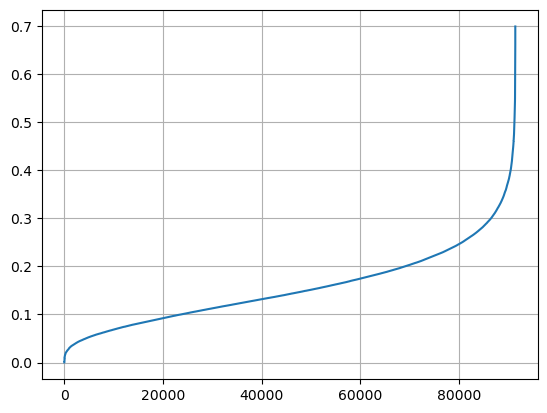

In [23]:

print(X_train.shape)

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X_train)
distances, indices = nbrs.kneighbors(X_train)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.grid()
plt.plot(distances)


Euclidean k-means
2.810 --> 2.216 --> 2.181 --> 2.169 --> 2.162 --> 2.156 --> 2.152 --> 2.149 --> 2.147 --> 2.144 --> 2.143 --> 2.142 --> 2.141 --> 2.140 --> 2.139 --> 2.139 --> 2.138 --> 2.138 --> 2.137 --> 2.137 --> 2.137 --> 2.137 --> 2.136 --> 2.136 --> 2.136 --> 2.136 --> 2.136 --> 2.136 --> 2.135 --> 2.135 --> 2.135 --> 2.135 --> 2.135 --> 2.135 --> 2.135 --> 2.135 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.134 --> 2.133 --> 2.133 --> 2.133 --> 2.133 --> 2.133 --> 


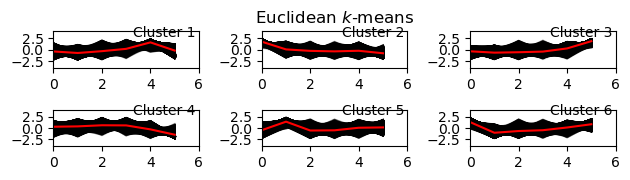

In [70]:

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=6, verbose=True, random_state=seed, n_jobs=-1)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(6):
    plt.subplot(6, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()


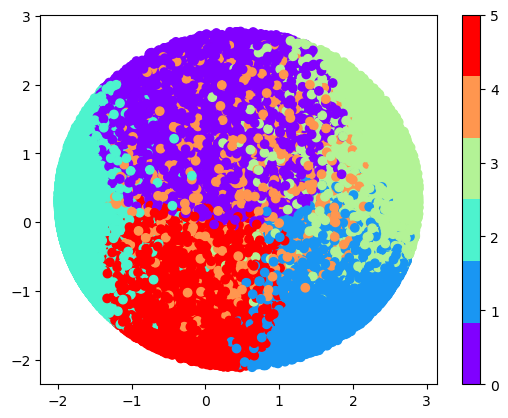

In [73]:
from matplotlib.colors import ListedColormap
# projection and display of data

# project to 2D for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

unique_labels = np.unique(y_pred)
num_labels = len(unique_labels)
colors = plt.cm.rainbow(np.linspace(0, 1, num_labels))
cmap = ListedColormap(colors)

# plot data
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_pred, cmap=cmap)
plt.colorbar()
plt.show()

(array([15515.,     0., 14390.,     0., 28066.,     0., 11037.,     0.,
         6750., 15612.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

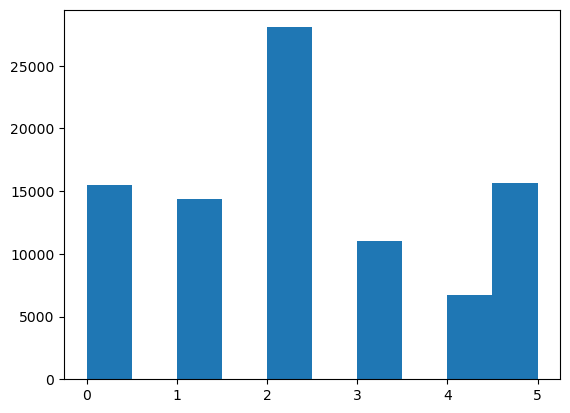

In [72]:
y_pred
plt.hist(y_pred)

In [55]:
# HDBSCAN clustering
print("HDBSCAN")
from hdbscan import HDBSCAN

seed = 0
np.random.seed(seed)
X_train = SFH_lev
# X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
sz = X_train.shape[1]

# Reshape X_train to 2 dimensions
nSamples, nx, ny = X_train.shape
X_train = X_train.reshape((nSamples, nx*ny))

# Now to apply HDBSCAN
clusterer = HDBSCAN(min_cluster_size=5, min_samples=5, cluster_selection_epsilon=0.3)
cluster_labels = clusterer.fit_predict(X_train)

# print labels of unique clusters
print(np.unique(cluster_labels))
print(np.bincount(cluster_labels+1))





HDBSCAN
[-1  0  1  2  3  4  5  6  7  8  9]
[ 2419     6     5     9     5     5     5     5    10     5 88896]


[-1  0  1]
[30453    25 60892]


(array([3.0453e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0892e+04]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

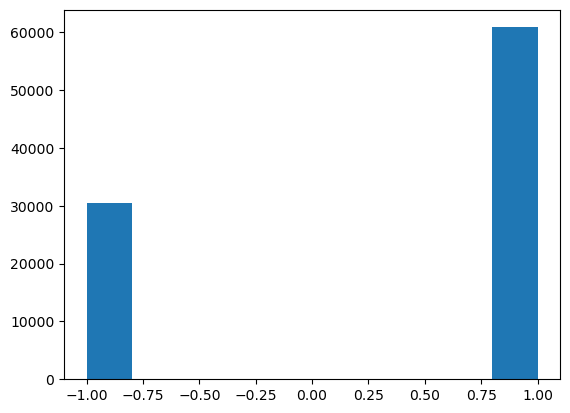

In [53]:

print(np.unique(cluster_labels))

#print the number of cluster of each label
print(np.bincount(cluster_labels+1))

y_pred = cluster_labels

# histogram of cluster distribution
plt.hist(y_pred)


In [ ]:
# Plot data



In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

seed = 0
np.random.seed(seed)
X_train = SFH_lev
# X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)
# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
sz = X_train.shape[1]

# Reshape X_train to 2 dimensions
nSamples, nx, ny = X_train.shape
X_train = X_train.reshape((nSamples, nx*ny))



(91370, 6)
DBSCAN
[  660 90538     4     6    14    13     7     2     5     2     9     7
     8     3     5     4     6    12     3     4     2     5     5     5
     4     7     5     7     3     4     5     4     2]


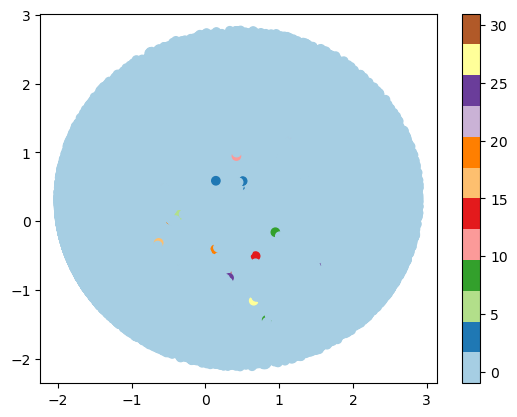

In [67]:

print(X_train.shape)

# DBSCAN clustering
print("DBSCAN")
dbscan = DBSCAN(eps=0.5, min_samples=5, n_jobs=-1)  # Adjust parameters here
y_pred = dbscan.fit_predict(X_train)

# print labels of unique clusters
print(np.bincount(y_pred+1))


# project to 2D for plotting
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(X_train)

# plot data clustered by DBSCAN
plt.scatter(X_train_2d[:,0], X_train_2d[:,1], c=y_pred, cmap='Paired')
plt.colorbar()
plt.show()





(array([9.1225e+04, 1.7000e+01, 1.6000e+01, 2.0000e+01, 1.4000e+01,
        2.1000e+01, 1.8000e+01, 1.3000e+01, 1.1000e+01, 1.5000e+01]),
 array([-1. ,  2.2,  5.4,  8.6, 11.8, 15. , 18.2, 21.4, 24.6, 27.8, 31. ]),
 <BarContainer object of 10 artists>)

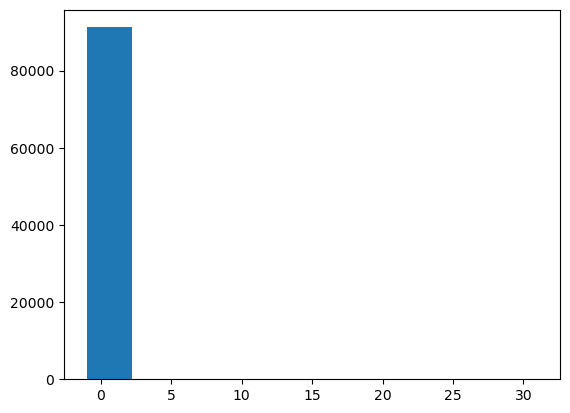

In [13]:
y_pred
plt.hist(y_pred)

Euclidean k-means


C:\Users\Maxime\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


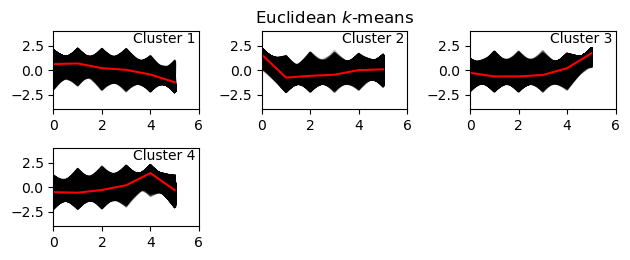

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets

seed = 0
np.random.seed(seed)

X_train = SFH_lev
# X_train = X_train[y_train < 4]  # Keep first 3 classes
np.random.shuffle(X_train)

# Keep only 50 time series
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)

# Reshape the data to 2D
n_samples, sz, d = X_train.shape
X_train_2d = X_train.reshape((n_samples, sz * d))

# Euclidean k-means
print("Euclidean k-means")
km = KMeans(n_clusters=4, random_state=seed)
y_pred = km.fit_predict(X_train_2d)

# Reshape cluster centers back to 3D
cluster_centers_3d = km.cluster_centers_.reshape((4, sz, d))

plt.figure()
for yi in range(4):
    plt.subplot(4, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(cluster_centers_3d[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85, 'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

plt.tight_layout()
plt.show()
